Import necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sales_df = pd.read_csv('Video_games.csv')
sales_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


### Cleaning up data

Task 1: Remove NaN values

In [5]:
sales_df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [6]:
# drop nan values from name, year of release, genre and publisher columns

sales_df = sales_df.dropna(subset=['Name', 'Year_of_Release', 'Genre', 'Publisher'])
sales_df.isnull().sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8434
Critic_Count       8434
User_Score         6579
User_Count         8955
Developer          6512
Rating             6649
dtype: int64

Task 2: Replace NaN values

In [7]:
# replace nan values from several columns

values = {'Critic_Score': 0, 'Critic_Count': 0, 'User_Score': 0, 'User_Count':0}
sales_df = sales_df.fillna(value=values)


values2 = {'Developer': 'Not provided', 'Rating': 'Not provided'}
sales_df = sales_df.fillna(value=values2)
sales_df.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

### Data Analysis

#### Proportion of games released by genre

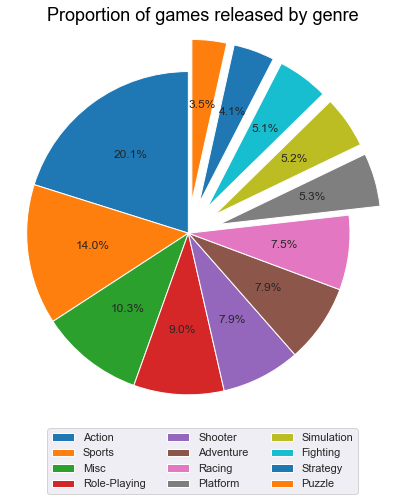

In [8]:

# get data
games_proportion = sales_df['Genre'].value_counts(normalize=True) * 100
games_proportion


labels = ['Action','Sports','Misc', 'Role-Playing', 'Shooter', 'Adventure','Racing',
            'Platform','Simulation','Fighting','Strategy','Puzzle']

sizes = sales_df['Genre'].value_counts(normalize=True) * 100
explode = [0.,0.,0.,0.,0.,0.,0.,0.3,0.3,0.3,0.3,0.3]

fig1, ax1 = plt.subplots()

sns.set_theme()

# fig size
fig = plt.gcf()
fig.set_size_inches(7,7)

# pie chart confg
ax1.pie(sizes, explode=explode, autopct='%1.1f%%', shadow = False, startangle=90, radius=1.5)
ax1.axis('equal') # equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportion of games released by genre', fontsize=18)
plt.legend(labels=labels, loc='upper center', bbox_to_anchor=(0.5, -0.04), ncol=3)

plt.show()

#### Games released count by genre

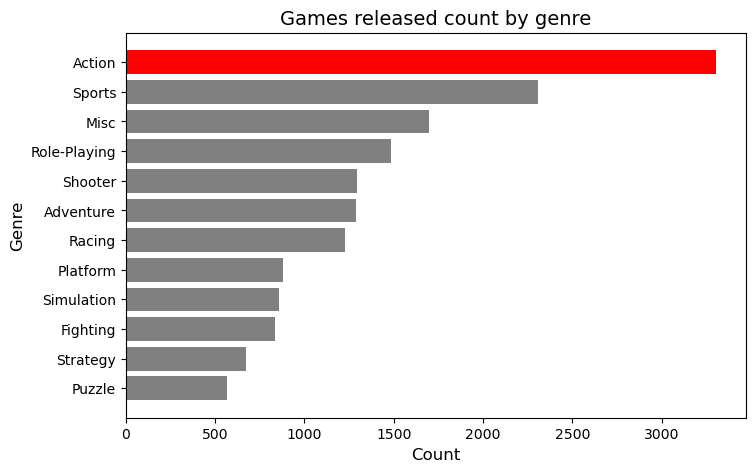

In [9]:
#get data
data_count = sales_df['Genre'].value_counts()
colors = ['red','grey','grey','grey','grey','grey','grey',
            'grey','grey','grey','grey','grey']
genres = ['Action','Sports','Misc', 'Role-Playing', 'Shooter', 'Adventure','Racing',
            'Platform','Simulation','Fighting','Strategy','Puzzle']


plt.rcdefaults()
fig, ax = plt.subplots()
fig.set_size_inches(8,5)

# bar chart confg
ax.barh(genres, data_count, align='center', color=colors)
ax.set_yticks(genres)
ax.invert_yaxis()
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Genre', fontsize=12)
plt.title('Games released count by genre', fontsize=14)

plt.show()

#### Games released on platforms count

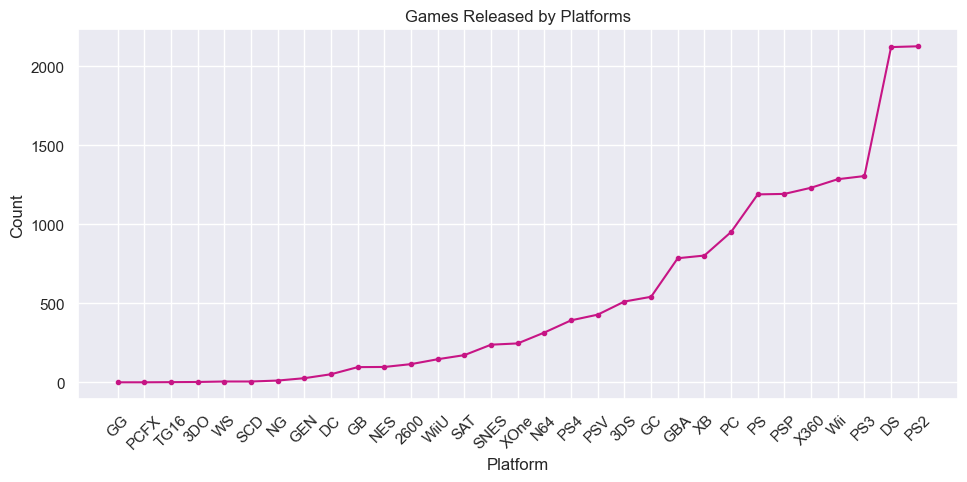

In [10]:
# get data
sales_df['Year_of_Release'] = sales_df['Year_of_Release'].astype(int)

games_per_platform = sales_df.groupby('Platform').size().sort_values()

games_per_platform


# plot conf
sns.set_theme()
plt.plot(games_per_platform, marker='.', color='mediumvioletred')
plt.xticks(rotation=45)
plt.subplots_adjust(right=1.5)

plt.title('Games Released by Platforms')
plt.xlabel('Platform')
plt.ylabel('Count')


plt.show()


#### Gobal sales by genre

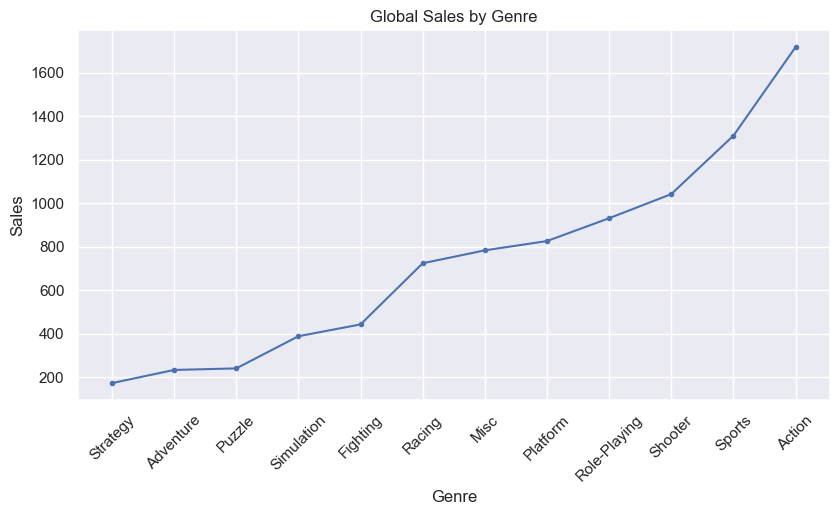

In [11]:
# get data
best_selling = sales_df.groupby('Genre',)['Global_Sales'].sum().sort_values()

# plot cong
sns.set_theme()
plt.plot(best_selling, marker='.')
plt.xticks(rotation=45)
plt.subplots_adjust(right=1.3)
plt.title('Global Sales by Genre')
plt.ylabel('Sales')
plt.xlabel('Genre')

plt.show()

#### Global sales by platform

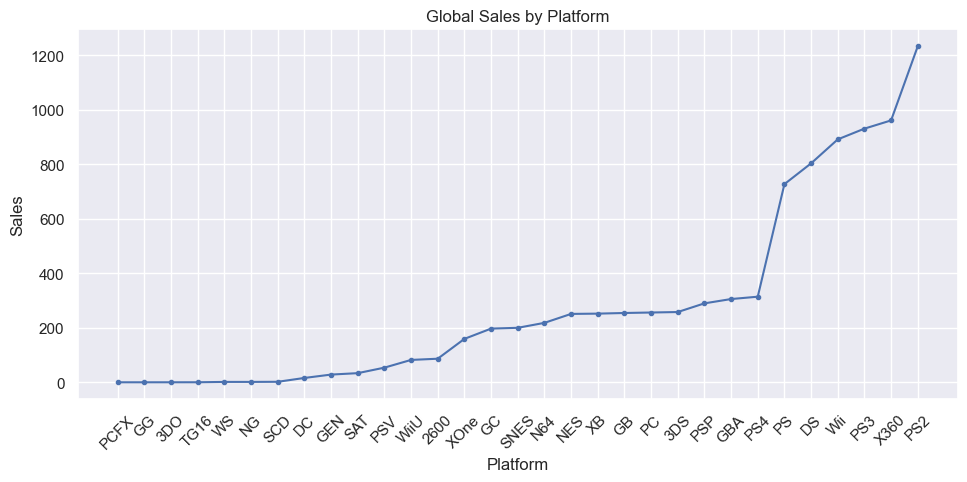

In [12]:

# get data
platform = sales_df.groupby('Platform')['Global_Sales'].sum().sort_values()

sns.set_theme()

# plot conf
plt.plot(platform, marker='.')
plt.xticks(rotation=45)
plt.subplots_adjust(right=1.5)

plt.title('Global Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Sales')


plt.show()

#### Global sales by rating

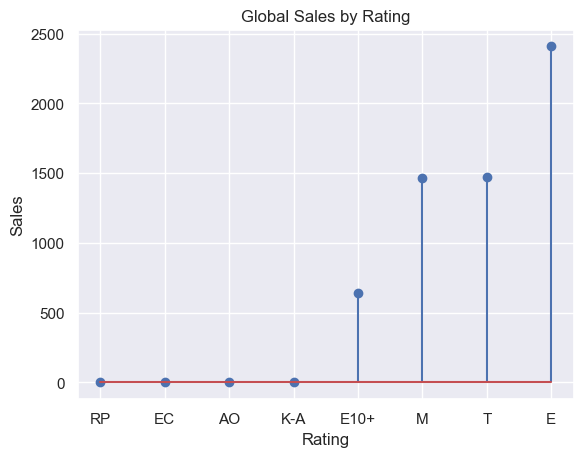

In [13]:
# get data

rating_sales = sales_df[sales_df.Rating != 'Not provided']
rating_sales = rating_sales.groupby('Rating')['Global_Sales'].sum().sort_values()


# plot confg
sns.set_theme()
rating_range = range(len(rating_sales.index))
plt.stem(rating_sales)
plt.xticks(rating_range, rating_sales.index)
plt.title('Global Sales by Rating')
plt.xlabel('Rating')
plt.ylabel('Sales')

plt.show()




#### Top ten selling games

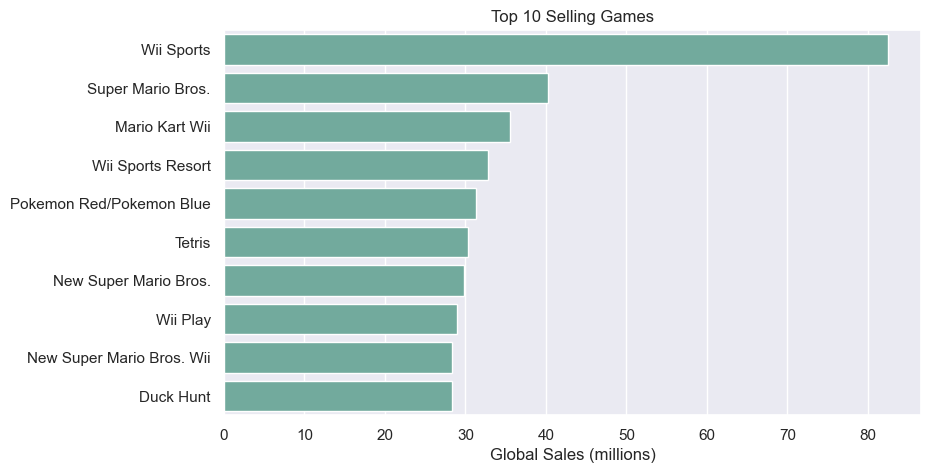

In [14]:
# get data

games_top_10 = sales_df[['Name','Global_Sales']].head(10)

# bar chart confg
plt.figure(figsize=(9,5))

sns.barplot(y=games_top_10.Name, 
            x=games_top_10.Global_Sales, 
            color='#69b3a2')
plt.title('Top 10 Selling Games')
plt.xlabel('Global Sales (millions)')
plt.ylabel('')

plt.show()



#### Publishers released games and selling

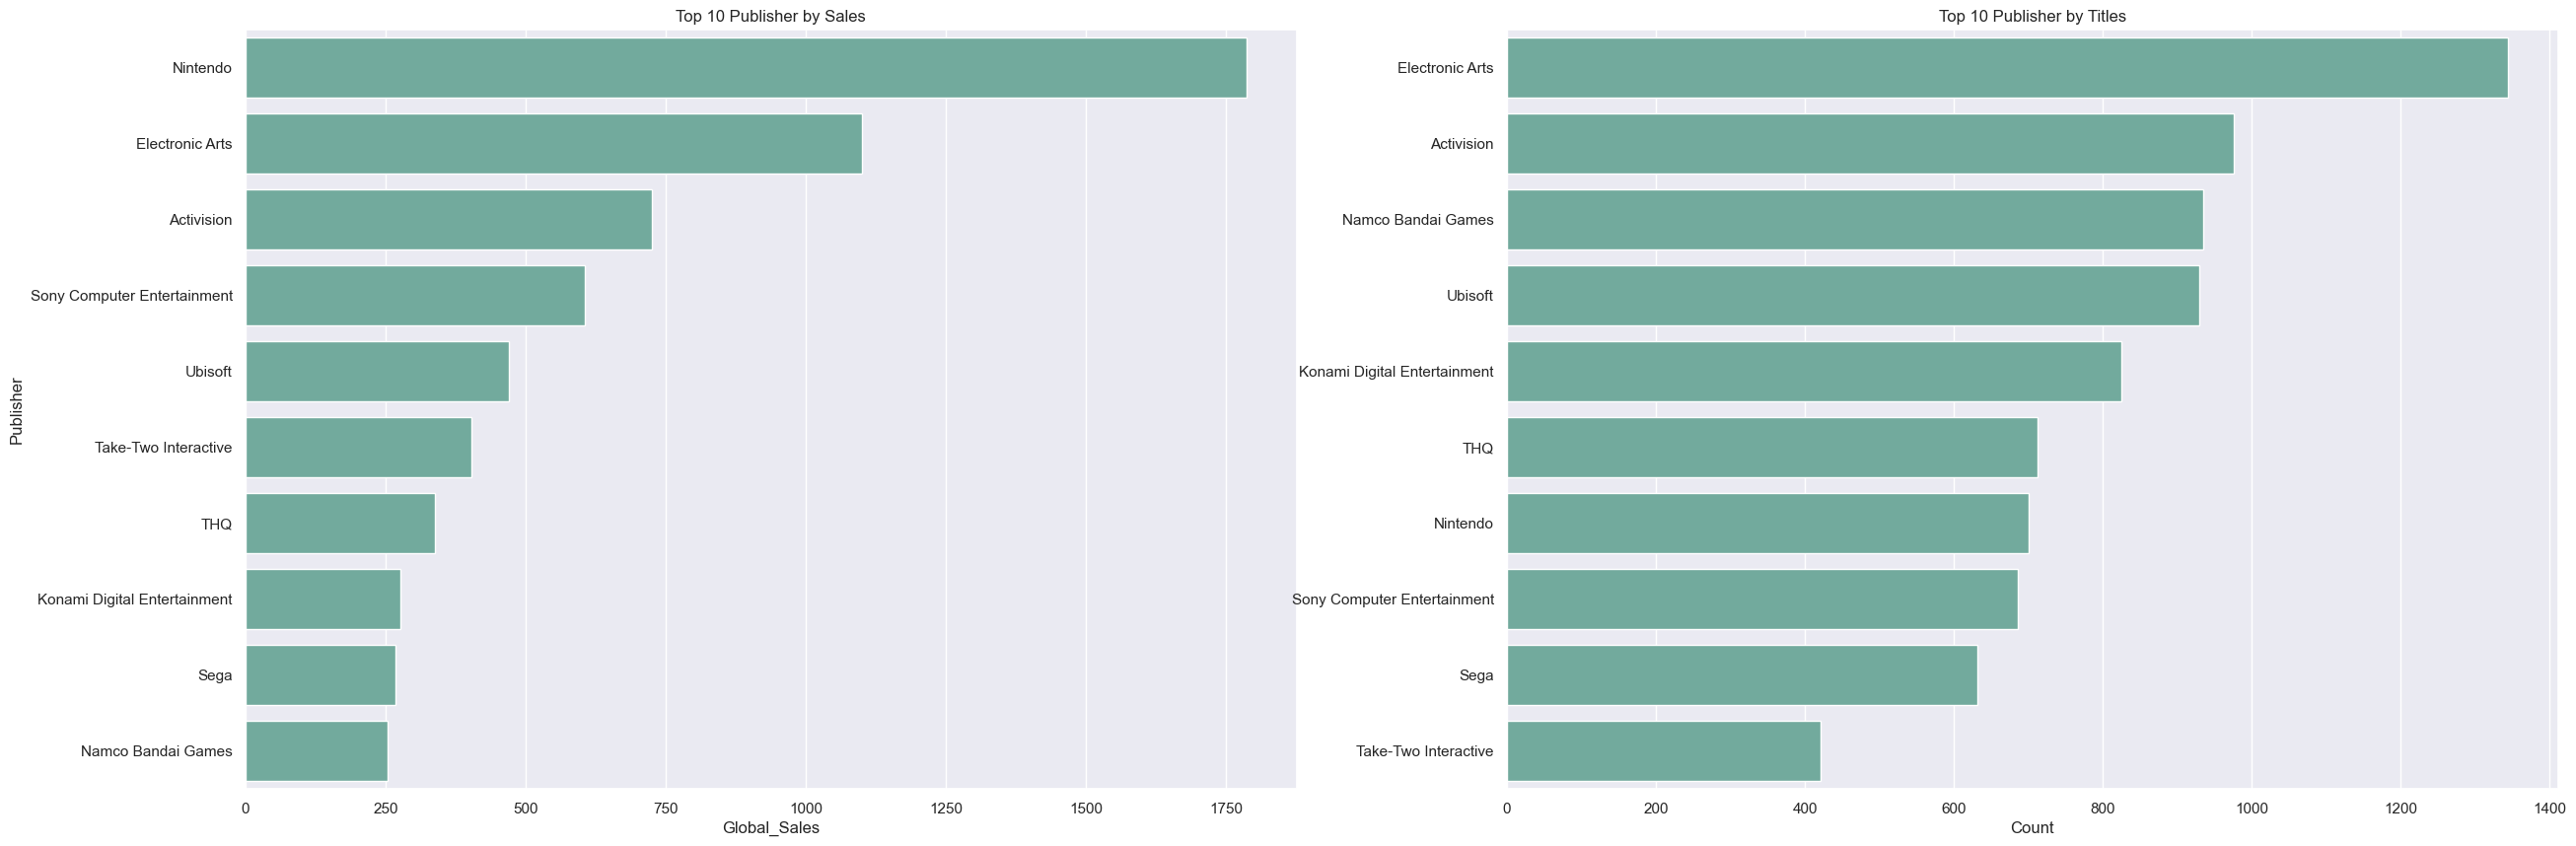

In [15]:

# get data for top ten in selling
sales_publisher = sales_df.groupby('Publisher').sum().sort_values(by='Global_Sales', ascending=False)
sales_publisher2 = sales_publisher['Global_Sales'].head(10)

#get data for top ten count
publisher_titles = sales_df['Publisher'].value_counts().head(10)
publisher_titles

# plot size
fig, ax = plt.subplots(1,2, figsize=(14,10),gridspec_kw=dict(width_ratios=[3,3]))

# bar chart num1 confg
sns.barplot(y=sales_publisher2.index, 
            x=sales_publisher2,
            color='#69b3a2',
            ax=ax[0]
)
ax[0].set_title('Top 10 Publisher by Sales')
plt.xlabel('Global Sales (millions)')
plt.ylabel('')

# bar chart num2 confg

sns.barplot(y=publisher_titles.index, 
            x=publisher_titles,
            color='#69b3a2',
            ax=ax[1]
)
ax[1].set_title('Top 10 Publisher by Titles')
plt.xlabel('Count')
plt.ylabel('')

#set up margin between bar charts
plt.subplots_adjust(right=1.8)

plt.show()

